In [2]:
# Data Manipulation
import pandas as pd
import numpy as np

# VIsualization
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from matplotlib.pyplot import figure
%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8) #Adjust the configuration of the plots we will create

# Preprocessing
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.decomposition import PCA

# Machine Learning
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

# Model Selection
from sklearn.model_selection import GridSearchCV, cross_val_predict, cross_val_score

# Metrics
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import recall_score, precision_score, f1_score, roc_auc_score 

# ignore warnings
import warnings
warnings.filterwarnings("ignore")

## Data Inspection and EDA

In [3]:
# Read data
df = pd.read_csv('movies.csv')
print(df.shape)
df.head()

(7668, 15)


,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


In [4]:
#Locate missing data, outliers
df.describe()

,year,score,votes,budget,gross,runtime
count,7668.000000,7665.000000,7.665000e+03,5.497000e+03,7.479000e+03,7664.000000
mean,2000.405451,6.390411,8.810850e+04,3.558988e+07,7.850054e+07,107.261613
std,11.153508,0.968842,1.633238e+05,4.145730e+07,1.657251e+08,18.581247
min,1980.000000,1.900000,7.000000e+00,3.000000e+03,3.090000e+02,55.000000
25%,1991.000000,5.800000,9.100000e+03,1.000000e+07,4.532056e+06,95.000000
50%,2000.000000,6.500000,3.300000e+04,2.050000e+07,2.020576e+07,104.000000
75%,2010.000000,7.100000,9.300000e+04,4.500000e+07,7.601669e+07,116.000000
max,2020.000000,9.300000,2.400000e+06,3.560000e+08,2.847246e+09,366.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7668 entries, 0 to 7667
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      7668 non-null   object 
 1   rating    7591 non-null   object 
 2   genre     7668 non-null   object 
 3   year      7668 non-null   int64  
 4   released  7666 non-null   object 
 5   score     7665 non-null   float64
 6   votes     7665 non-null   float64
 7   director  7668 non-null   object 
 8   writer    7665 non-null   object 
 9   star      7667 non-null   object 
 10  country   7665 non-null   object 
 11  budget    5497 non-null   float64
 12  gross     7479 non-null   float64
 13  company   7651 non-null   object 
 14  runtime   7664 non-null   float64
dtypes: float64(5), int64(1), object(9)
memory usage: 898.7+ KB


In [6]:
for col in df.columns:
    pct_missing = np.mean(df[col].isnull())*100
    print(f'{col} - {round(pct_missing,3)}%')

name - 0.0%
rating - 1.004%
genre - 0.0%
year - 0.0%
released - 0.026%
score - 0.039%
votes - 0.039%
director - 0.0%
writer - 0.039%
star - 0.013%
country - 0.039%
budget - 28.312%
gross - 2.465%
company - 0.222%
runtime - 0.052%


In [7]:

df_cleaned = df.dropna()
for col in df_cleaned.columns:
    pct_missing = np.mean(df_cleaned[col].isnull())*100
    print(f'{col} - {pct_missing}%')

name - 0.0%
rating - 0.0%
genre - 0.0%
year - 0.0%
released - 0.0%
score - 0.0%
votes - 0.0%
director - 0.0%
writer - 0.0%
star - 0.0%
country - 0.0%
budget - 0.0%
gross - 0.0%
company - 0.0%
runtime - 0.0%


In [8]:
#Change data type
df_cleaned['budget'] = df_cleaned['budget'].astype('int64')
df_cleaned['gross'] = df_cleaned['gross'].astype('int64')
df_cleaned.head(20)

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98.0
5,Friday the 13th,R,Horror,1980,"May 9, 1980 (United States)",6.4,123000.0,Sean S. Cunningham,Victor Miller,Betsy Palmer,United States,550000,39754601,Paramount Pictures,95.0
6,The Blues Brothers,R,Action,1980,"June 20, 1980 (United States)",7.9,188000.0,John Landis,Dan Aykroyd,John Belushi,United States,27000000,115229890,Universal Pictures,133.0
7,Raging Bull,R,Biography,1980,"December 19, 1980 (United States)",8.2,330000.0,Martin Scorsese,Jake LaMotta,Robert De Niro,United States,18000000,23402427,Chartoff-Winkler Productions,129.0
8,Superman II,PG,Action,1980,"June 19, 1981 (United States)",6.8,101000.0,Richard Lester,Jerry Siegel,Gene Hackman,United States,54000000,108185706,Dovemead Films,127.0
9,The Long Riders,R,Biography,1980,"May 16, 1980 (United States)",7.0,10000.0,Walter Hill,Bill Bryden,David Carradine,United States,10000000,15795189,United Artists,100.0


In [9]:
# Define a function to extract the year
def extract_year(date_str):
    try:
        return int(date_str.split(', ')[1].split()[0])  # Extract year from "Month Day, Year ..."
    except (IndexError, ValueError):
        return None  # Handle cases with missing or malformed dates

# Apply the function to the 'released' column
df_cleaned['year_released'] = df_cleaned['released'].apply(extract_year)
df_cleaned = df_cleaned.dropna()
df_cleaned['year_released'] = pd.to_numeric(df_cleaned['year_released'], errors='coerce')
# df_cleaned['year_released'] = df_cleaned.astype('int')
df_cleaned.dtypes


name              object
rating            object
genre             object
year               int64
released          object
score            float64
votes            float64
director          object
writer            object
star              object
country           object
budget             int64
gross              int64
company           object
runtime          float64
year_released    float64
dtype: object

In [10]:
df_cleaned.describe()

,year,score,votes,budget,gross,runtime,year_released
count,5407.000000,5407.000000,5.407000e+03,5.407000e+03,5.407000e+03,5407.000000,5407.000000
mean,2001.689846,6.393194,1.153467e+05,3.608856e+07,1.034955e+08,108.169595,2001.839467
std,10.532659,0.962755,1.845629e+05,4.159678e+07,1.874721e+08,18.122898,10.540925
min,1980.000000,1.900000,1.950000e+02,6.000000e+03,3.090000e+02,63.000000,1980.000000
25%,1993.000000,5.800000,1.900000e+04,1.000000e+07,1.085234e+07,95.000000,1994.000000
50%,2002.000000,6.500000,5.200000e+04,2.200000e+07,3.729544e+07,105.000000,2002.000000
75%,2011.000000,7.100000,1.300000e+05,4.500000e+07,1.130424e+08,118.000000,2011.000000
max,2020.000000,9.300000,2.400000e+06,3.560000e+08,2.847246e+09,271.000000,2020.000000


In [11]:
df_cleaned.head(10)

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,year_released
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146.0,1980.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104.0,1980.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124.0,1980.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88.0,1980.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98.0,1980.0
5,Friday the 13th,R,Horror,1980,"May 9, 1980 (United States)",6.4,123000.0,Sean S. Cunningham,Victor Miller,Betsy Palmer,United States,550000,39754601,Paramount Pictures,95.0,1980.0
6,The Blues Brothers,R,Action,1980,"June 20, 1980 (United States)",7.9,188000.0,John Landis,Dan Aykroyd,John Belushi,United States,27000000,115229890,Universal Pictures,133.0,1980.0
7,Raging Bull,R,Biography,1980,"December 19, 1980 (United States)",8.2,330000.0,Martin Scorsese,Jake LaMotta,Robert De Niro,United States,18000000,23402427,Chartoff-Winkler Productions,129.0,1980.0
8,Superman II,PG,Action,1980,"June 19, 1981 (United States)",6.8,101000.0,Richard Lester,Jerry Siegel,Gene Hackman,United States,54000000,108185706,Dovemead Films,127.0,1981.0
9,The Long Riders,R,Biography,1980,"May 16, 1980 (United States)",7.0,10000.0,Walter Hill,Bill Bryden,David Carradine,United States,10000000,15795189,United Artists,100.0,1980.0


In [12]:
#drop duplicates
df_cleaned['company'].drop_duplicates().sort_values(ascending=False)

7129                                thefyzz
5664                            micro_scope
4007                               i5 Films
6793                             i am OTHER
6420                                   erbp
                       ...                 
385                        1818 Productions
2929                          1492 Pictures
3024                        .406 Production
7525    "Weathering With You" Film Partners
4345        "DIA" Productions GmbH & Co. KG
Name: company, Length: 1469, dtype: object

In [13]:
df_cleaned.drop_duplicates().head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,year_released
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146.0,1980.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104.0,1980.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124.0,1980.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88.0,1980.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98.0,1980.0


In [14]:
# Drop the columns that exist in the dataframe
df_cleaned['evaluation'] = ['Good' if x >= 6.5 else 'Bad' for x in df_cleaned['score']]
df_cleaned = df_cleaned.drop(['released', 'name','score'], axis=1, errors='ignore')
df_cleaned.head()

,rating,genre,year,votes,director,writer,star,country,budget,gross,company,runtime,year_released,evaluation
0,R,Drama,1980,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146.0,1980.0,Good
1,R,Adventure,1980,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104.0,1980.0,Bad
2,PG,Action,1980,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124.0,1980.0,Good
3,PG,Comedy,1980,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88.0,1980.0,Good
4,R,Comedy,1980,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98.0,1980.0,Good


# EDA Visualization

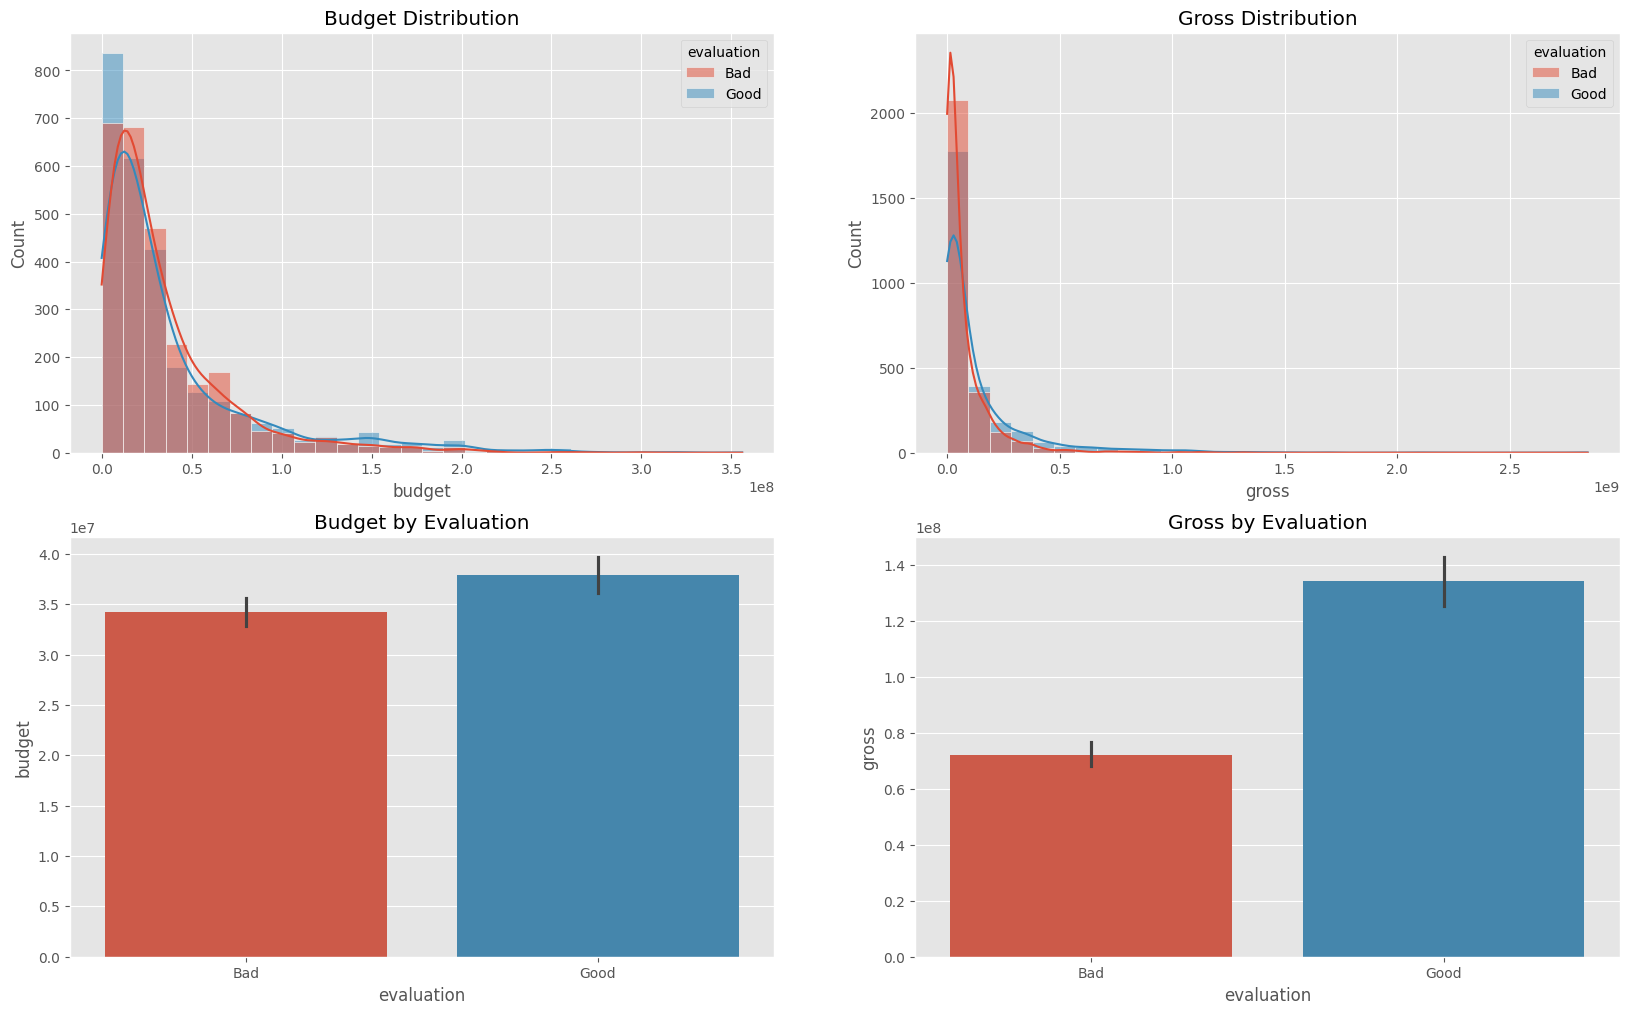

In [15]:
fig, axes = plt.subplots(2, 2, figsize=(20, 12))

df_cleaned['evaluation'] = df_cleaned['evaluation'].astype('category')
sns.histplot(df_cleaned, x='budget', kde=True, hue='evaluation', bins=30, ax=axes[0, 0])
axes[0, 0].set_title('Budget Distribution')

sns.histplot(df_cleaned, x='gross', kde=True, hue='evaluation', bins=30, ax=axes[0, 1])
axes[0, 1].set_title('Gross Distribution')

sns.barplot(data=df_cleaned, x='evaluation', y='budget', ax=axes[1, 0], hue='evaluation')
axes[1, 0].set_title('Budget by Evaluation')

sns.barplot(data=df_cleaned, x='evaluation', y='gross', ax=axes[1, 1], hue='evaluation')
axes[1, 1].set_title('Gross by Evaluation')

plt.show()

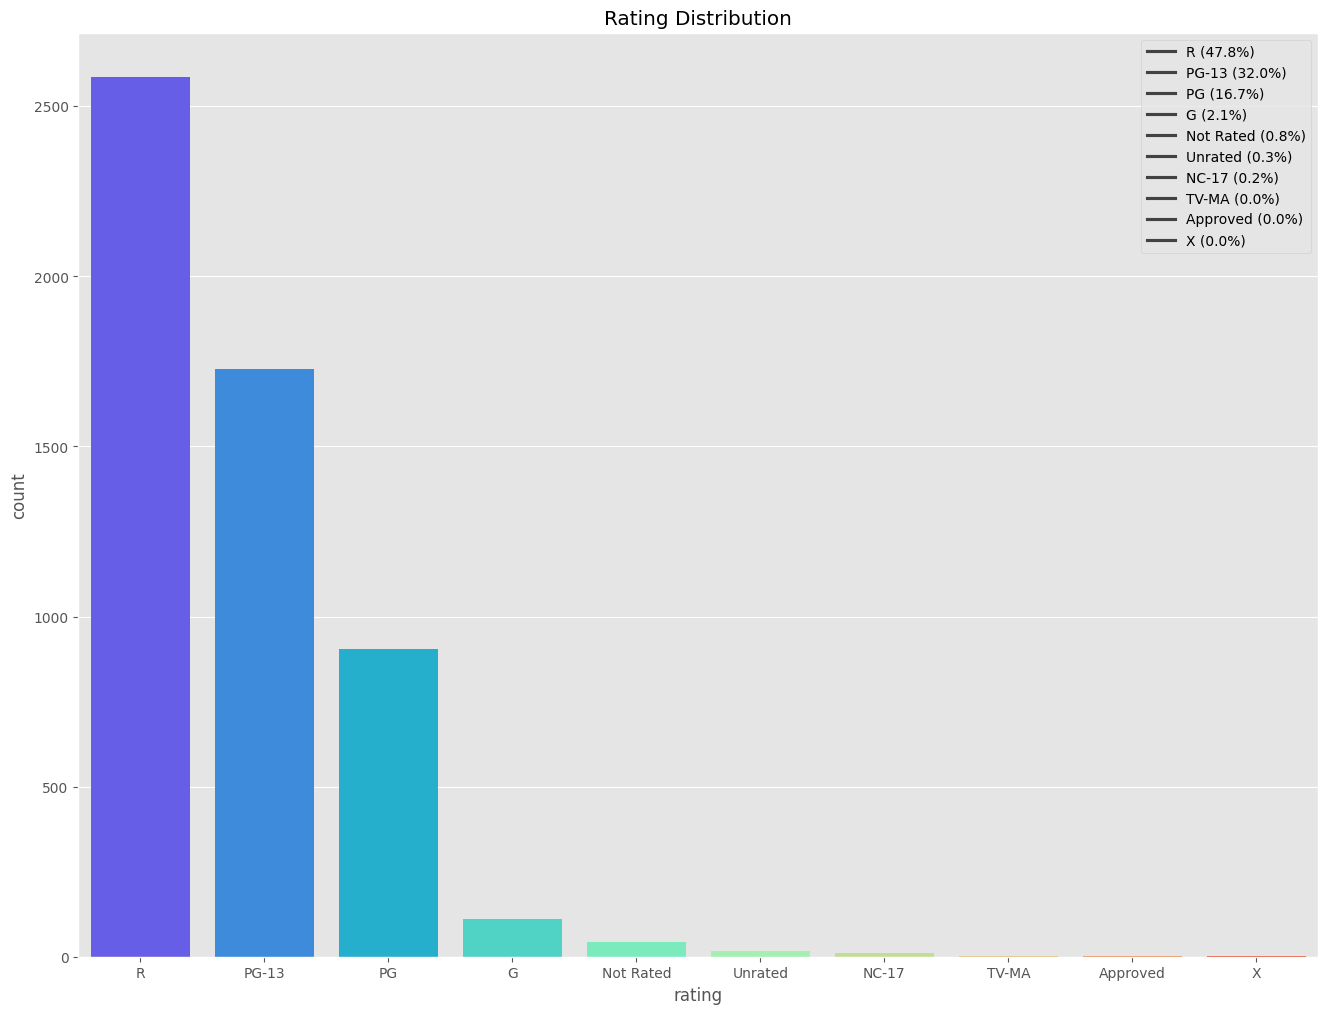

In [16]:
# Calculate the percentage
rating_counts = df_cleaned['rating'].value_counts()
labels = [f'{label} ({count / rating_counts.sum() * 100:.1f}%)' for label, count in rating_counts.items()]

plt.figure(figsize=(16, 12))
sns.barplot(rating_counts, palette='rainbow')
plt.title('Rating Distribution')
plt.legend(labels, loc='upper right')
plt.show()

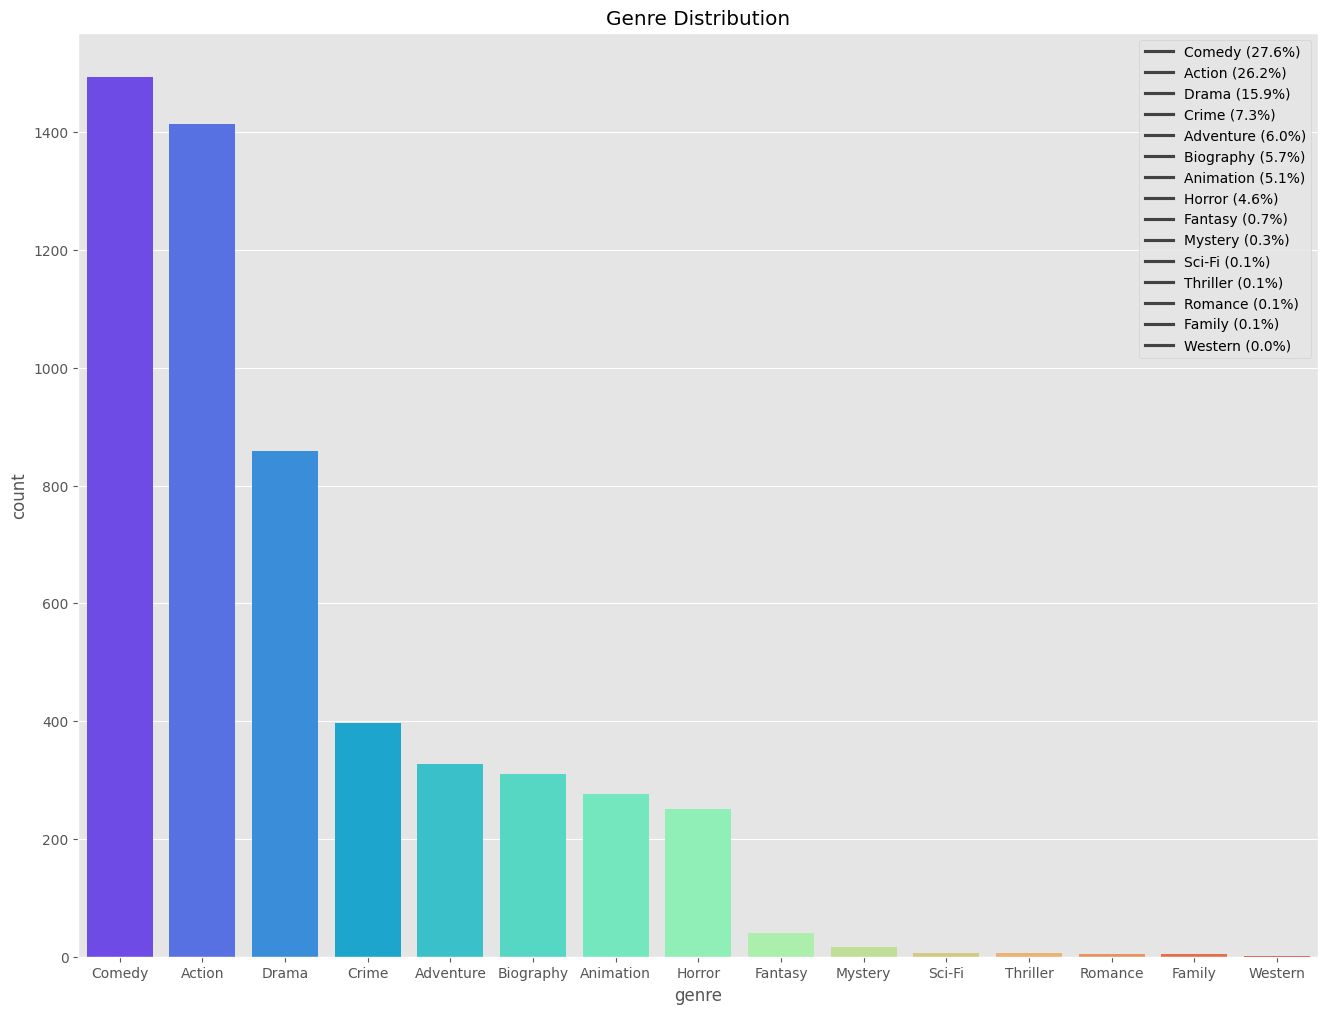

In [17]:
# Calculate the percentage
genre_counts = df_cleaned['genre'].value_counts()
labels = [f'{label} ({count / genre_counts.sum() * 100:.1f}%)' for label, count in genre_counts.items()]

plt.figure(figsize=(16, 12))
sns.barplot(genre_counts, palette='rainbow')
plt.title('Genre Distribution')
plt.legend(labels, loc='upper right')
plt.show()

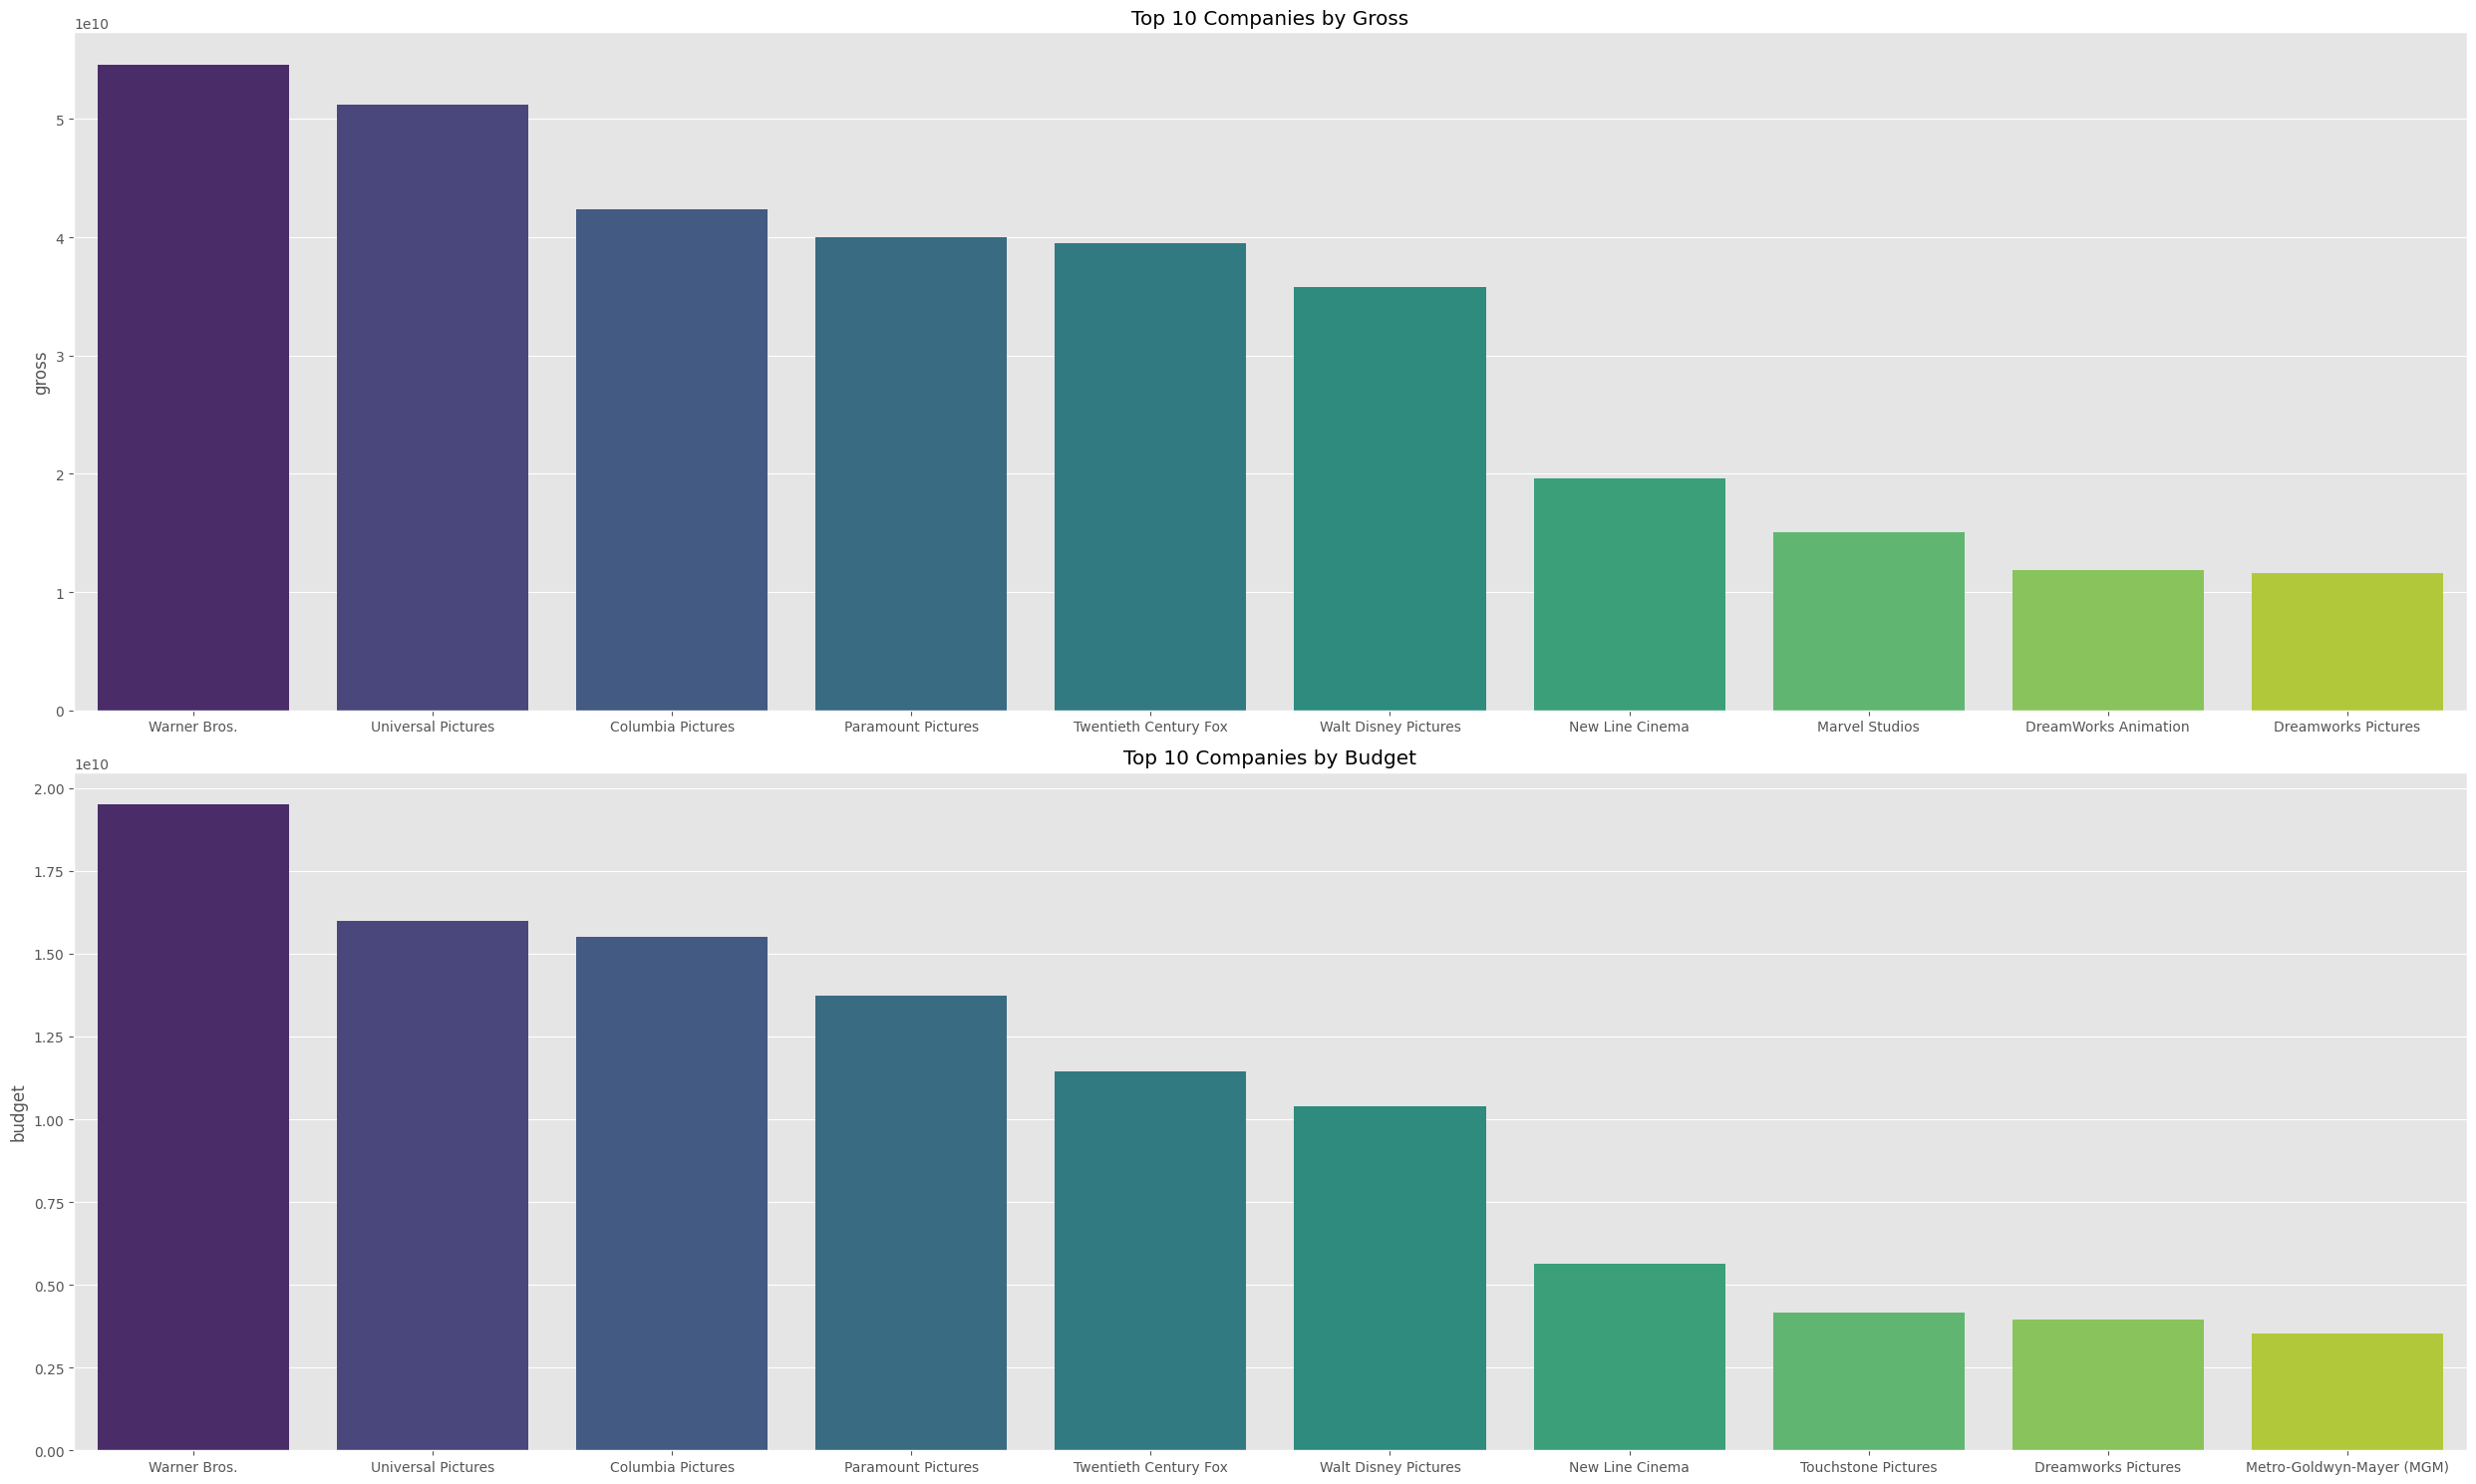

In [18]:
#Plot 10 most popular companies by highest gross, and budget
top_companies = df_cleaned.groupby('company')[['gross', 'budget']].sum().nlargest(10, 'gross')
top_companies1 = df_cleaned.groupby('company')[['gross', 'budget']].sum().nlargest(10, 'budget')

top_gross = top_companies.sort_values('gross', ascending=False)
top_budget = top_companies1.sort_values('budget', ascending=False)

fig, axes = plt.subplots(2, 1, figsize=(25, 15))
sns.barplot(data=top_gross, x=top_gross.index, y='gross', ax=axes[0], palette='viridis')
axes[0].set_title('Top 10 Companies by Gross')
axes[0].set_xlabel('')

sns.barplot(data=top_budget, x=top_budget.index, y='budget', ax=axes[1], palette='viridis')
axes[1].set_title('Top 10 Companies by Budget')
axes[1].set_xlabel('')

plt.tight_layout()
plt.show()

# Preprocessing (Train Test Split)

In [19]:
df_cleaned.head()

,rating,genre,year,votes,director,writer,star,country,budget,gross,company,runtime,year_released,evaluation
0,R,Drama,1980,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146.0,1980.0,Good
1,R,Adventure,1980,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104.0,1980.0,Bad
2,PG,Action,1980,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124.0,1980.0,Good
3,PG,Comedy,1980,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88.0,1980.0,Good
4,R,Comedy,1980,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98.0,1980.0,Good


In [20]:
df_cleaned = df_cleaned.drop(['company', 'country', 'director', 'star', 'writer'], axis=1)

In [21]:
#One-hot Encoding
df_cleaned = pd.get_dummies(df_cleaned, columns=['rating', 'genre'], drop_first=True)

In [22]:
X = df_cleaned.drop('evaluation', axis=1)
y = df_cleaned['evaluation']

In [23]:
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.2, random_state=42)  # 80% training and 20% test

In [24]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(4325, 29)
(1082, 29)
(4325,)
(1082,)


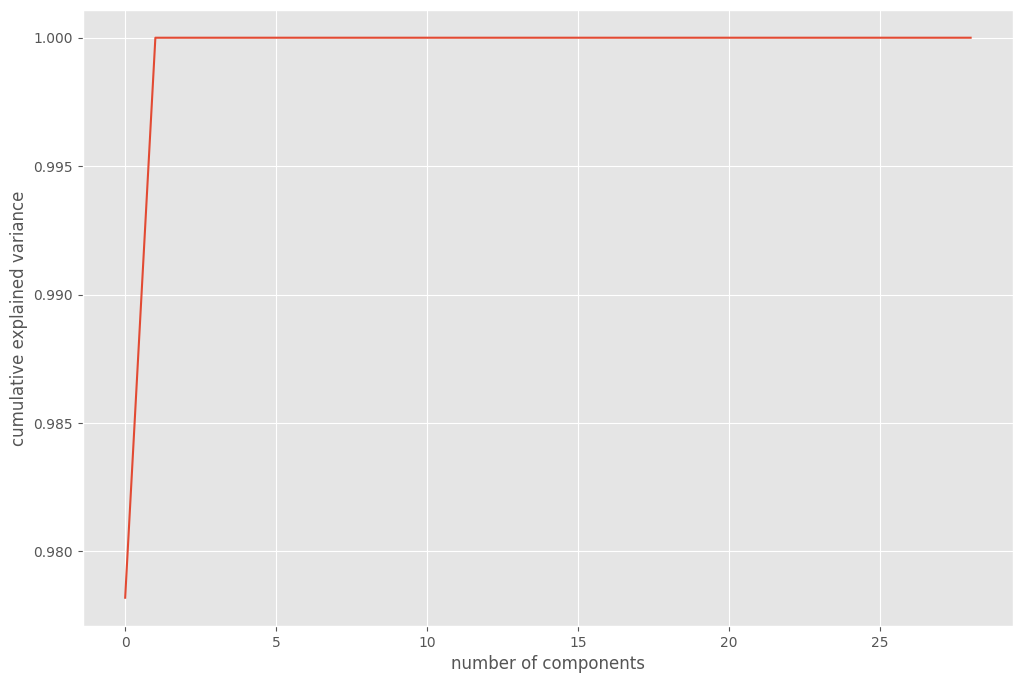

In [25]:
pca = PCA().fit(X_train, y_train)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()

In [26]:
X_train_pca = PCA(n_components=5).fit_transform(X_train)
X_test_pca = PCA(n_components=5).fit_transform(X_test)

In [27]:
def best_models(train, test,y_train,y_test,model,params):

    grid = GridSearchCV(estimator=model,
                    param_grid=params, 
                    cv=3, 
                    scoring = 'accuracy', 
                    return_train_score=True)
    
    grid.fit(train,y_train)

    best_model = grid.best_estimator_
    best_par = grid.best_params_
    best_sc = grid.best_score_

    best_model.fit(train,y_train)
    pred = best_model.predict(test)

    f1 = f1_score(y_test, pred, average='macro')
    conf_matrix = confusion_matrix(y_test,pred)
    report = classification_report(y_test,pred)

    return best_par, best_model, best_sc, f1, conf_matrix, report

In [34]:
x_train_list = [X_train, X_train_pca]
x_test_list = [X_test, X_test_pca]
# y_train_list = [ytrain,ytrain_scaled]
# y_test_list = [ytest,ytest_scaled]
data_names = ['normal','pca']
svc = SVC()
lr = LogisticRegression()
knn = KNeighborsClassifier()
dt = DecisionTreeClassifier()

models = [lr,knn,dt]

svc_param_grid = {
    'kernel' : ['linear'],
    'C' : np.logspace(-2,2,10),
    'gamma' : ['scale','auto']
}

knn_param_grid = {
    'n_neighbors' : np.arange(1,30),
    'weights' : ['uniform','distance'],
    'p' : [1,2]
}

lr_param_grid = {
    'C' : np.logspace(-3,3,10),
    'penalty' : ['l1','l2'],
    'solver' : ['liblinear'],
    'fit_intercept' : [True, False]
}

dt_param_grid = {
    'max_depth': np.arange(1, 20),
    'min_samples_split': [2, 5, 10, 20],
    'min_samples_leaf': [1, 2, 4, 8],
    'max_features': ['sqrt', 'log2', None]
}

params = [lr_param_grid, knn_param_grid, dt_param_grid]

In [35]:

results=pd.DataFrame({'model':[], 'data':[], 'best_m':[],'best_p':[],'best_sc':[],'F1':[]})

i=0
for m,p in zip(models, params):
    for tr,te,name in zip(x_train_list, x_test_list,data_names):
        results.loc[i,'model']=str(m)
        results.loc[i,'data']=str(name)
        try:
            best_par,best_model,best_sc,f1,conf_matrix,report = best_models(tr,te,y_train,y_test, m, p,)

            results.loc[i,'best_m']=str(best_model)
            results.loc[i,'best_p']=str(best_par)
            results.loc[i,'best_sc']=round(best_sc,2)
            results.loc[i,'F1']=round(f1,2)

            print(f'''
data: {name}
best model: {best_model}
best param: {best_par}
best score = {best_sc}
F1 = {f1}
confusion matrix:\n{conf_matrix}
classification report: \n{report}
            ''')
            print('\n***********************************\n')
            
        except Exception as e:
            print(f"Error processing {str(m)} with {name} data: {str(e)}")
            
        i=i+1

results


data: normal
best model: LogisticRegression(C=2.154434690031882, penalty='l1', solver='liblinear')
best param: {'C': 2.154434690031882, 'fit_intercept': True, 'penalty': 'l1', 'solver': 'liblinear'}
best score = 0.7710961559994391
F1 = 0.7557580943765294
confusion matrix:
[[447  93]
 [170 372]]
classification report: 
              precision    recall  f1-score   support

         Bad       0.72      0.83      0.77       540
        Good       0.80      0.69      0.74       542

    accuracy                           0.76      1082
   macro avg       0.76      0.76      0.76      1082
weighted avg       0.76      0.76      0.76      1082

            

***********************************


data: pca
best model: LogisticRegression(C=10.0, penalty='l1', solver='liblinear')
best param: {'C': 10.0, 'fit_intercept': True, 'penalty': 'l1', 'solver': 'liblinear'}
best score = 0.7482056593077123
F1 = 0.7234919818197411
confusion matrix:
[[426 114]
 [184 358]]
classification report: 
         

,model,data,best_m,best_p,best_sc,F1
0,LogisticRegression(),normal,"LogisticRegression(C=2.154434690031882, penalt...","{'C': 2.154434690031882, 'fit_intercept': True...",0.77,0.76
1,LogisticRegression(),pca,"LogisticRegression(C=10.0, penalty='l1', solve...","{'C': 10.0, 'fit_intercept': True, 'penalty': ...",0.75,0.72
2,KNeighborsClassifier(),normal,"KNeighborsClassifier(n_neighbors=25, p=1, weig...","{'n_neighbors': 25, 'p': 1, 'weights': 'distan...",0.58,0.55
3,KNeighborsClassifier(),pca,"KNeighborsClassifier(n_neighbors=27, p=1)","{'n_neighbors': 27, 'p': 1, 'weights': 'uniform'}",0.58,0.58
4,DecisionTreeClassifier(),normal,"DecisionTreeClassifier(max_depth=10, min_sampl...","{'max_depth': 10, 'max_features': None, 'min_s...",0.76,0.74
5,DecisionTreeClassifier(),pca,"DecisionTreeClassifier(max_depth=9, max_featur...","{'max_depth': 9, 'max_features': 'sqrt', 'min_...",0.75,0.71


In [30]:
grid = GridSearchCV(estimator=knn,
                    param_grid=knn_param_grid, 
                    cv=3, 
                    scoring = 'roc_auc', 
                    return_train_score=True)
grid.fit(X_train_pca,y_train)
y_pred = grid.predict(X_test_pca)


In [31]:
print(grid.best_params_)
print(accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

{'n_neighbors': 29, 'p': 1, 'weights': 'uniform'}
0.5831792975970426
[[335 205]
 [246 296]]
              precision    recall  f1-score   support

         Bad       0.58      0.62      0.60       540
        Good       0.59      0.55      0.57       542

    accuracy                           0.58      1082
   macro avg       0.58      0.58      0.58      1082
weighted avg       0.58      0.58      0.58      1082



In [32]:
grid = GridSearchCV(estimator=lr,
                    param_grid=lr_param_grid, 
                    cv=3, 
                    scoring = 'roc_auc', 
                    return_train_score=True)
grid.fit(X_train_pca,y_train)
y_pred = grid.predict(X_test_pca)


In [33]:
print(grid.best_params_)
print(accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

{'C': 0.001, 'fit_intercept': True, 'penalty': 'l1', 'solver': 'liblinear'}
0.7162661737523105
[[488  52]
 [255 287]]
              precision    recall  f1-score   support

         Bad       0.66      0.90      0.76       540
        Good       0.85      0.53      0.65       542

    accuracy                           0.72      1082
   macro avg       0.75      0.72      0.71      1082
weighted avg       0.75      0.72      0.71      1082

